Building good graphics with matplotlib ain't easy! The best route is to create a somewhat unattractive visualization with matplotlib, then export it to PDF and open it up in Illustrator. But if you want to get it to a good place first? 

**Let's do that.**

## Our data

We're going to be working with [OECD data](https://data.oecd.org/), specifically [unemployment](https://data.oecd.org/unemp/unemployment-rate.htm) from 1980 to the present for Japan, Australia, USA, and Germany. I've edited the data so it looks a little cleaner and is a little easier to work with.

In [9]:
%matplotlib inline
import pandas as pd

In [11]:
df = pd.read_csv("unemployment.csv")
df.head()

,country,year,unemployment
0,Australia,1980,6.106246
1,Australia,1981,5.783571
2,Australia,1982,7.156132
3,Australia,1983,9.961594
4,Australia,1984,8.989680


## pandas vs matplotlib

Under the hood, pandas plots graphs with the `matplotlib` library. This is usually pretty convenient since it allows you to just `.plot` your graphs, but since matplotlib is *kind of* a train wreck pandas inherits that confusion.

## Which `.plot` do I use?

When you use `.plot` on a dataframe, you *sometimes* pass things to it and *sometimes* you don't.

* `.plot` plots the index against every column
* `.plot(x='col1')` plots against a single specific column
* `.plot(x='col1', y='col2')` plots one specific column against another specific column

Let's see when you might use one or the other!

## Plotting Version 1: `.plot` plots the index against every column

Let's look at a slice somewhere in the middle of our data. It's nothing very exciting, just countries and years and unemployment rates.

In [27]:
df[35:40]

,country,year,unemployment
35,Australia,2015,6.063658
36,Australia,2016,5.723454
37,USA,1980,7.141667
38,USA,1981,7.600000
39,USA,1982,9.708333


See the column on the far left? That's the **index**. In this case, it's just the number of the row. First row is index `0`, 40th row is index `39`, etc.

If we graph using just `.plot`, it's going to use this row number as the X axis on our chart. What will that look like?

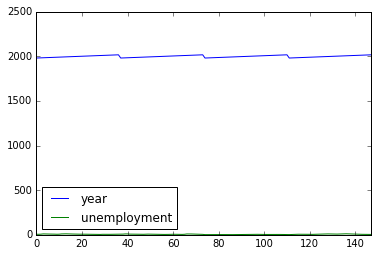

In [28]:
df.plot()

Weird, right? The x axis is just "hey, this is the 20th row, this is the 40th row, this is the 140th row" - nothing actually important. See where the little dips are in the blue line? The first drop is the data we just looked at: index 36 is Australia data for 2016, then index 37 is USA data for 1980. That's why it drops!

It's also plotting both the unemployment *and* the year. What a wreck!

The major use cases for `.plot()` is when you have a meaningful index, which usually happens in two situations:

* You've just done a `.value_counts()` or a `.groupby()`
* You've used `.set_index`, probably with dates

Let's take a look at how that works.

In [29]:
df.groupby("country")['unemployment'].mean()

country
Australia    6.954607
Germany      6.926593
Japan        3.515090
USA          6.379730
Name: unemployment, dtype: float64

When you do a groupby and summarize a column, you get a **Series**, not a dataframe. The important thing is to look at the data on the left - the index - and realize that this time it means something! It's a country's name! And in terms of "other" rows, there's only one - the average unemployment rate. So if we plot it...

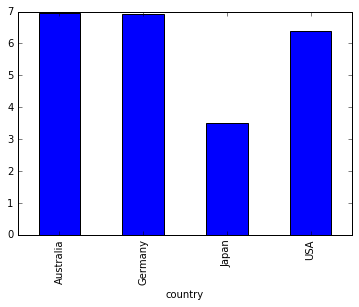

In [32]:
df.groupby("country")['unemployment'].mean().plot(kind='bar')

It's amazingly ugly, but at least it makes sense this time!

## Plotting Version 2: `.plot(x='col1')` plots against a single specific column


I... am going to skip this and tell you to just use version 3.

## Plotting Version 3: `.plot(x='col1', y='col2')` plots one specific column against another specific column

We know what we want, though - we want the **year on the x axis and the unemployment rate on the y axis.** If we give `.plot` both an `x=` and a `y=` we'll be able to take care of that, right?

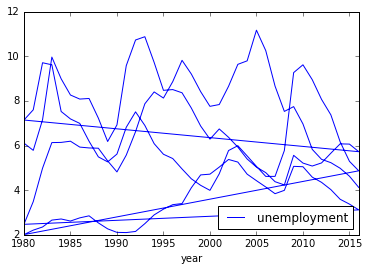

In [36]:
df.plot(x='year', y='unemployment')

Well, it **kind of** worked, at least!

When pandas plots, it assumes **every single data point should be connected,** aka pandas has no idea that we don't want row 36 (Australia in 2016) to connect to row 37 (USA in 1980). In order to fix that, we just need to add in a `groupby`. Once we've grouped the data together by country, pandas will plot each group separately.

country
Australia    Axes(0.125,0.125;0.775x0.775)
Germany      Axes(0.125,0.125;0.775x0.775)
Japan        Axes(0.125,0.125;0.775x0.775)
USA          Axes(0.125,0.125;0.775x0.775)
dtype: object

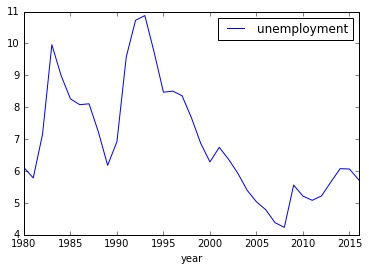

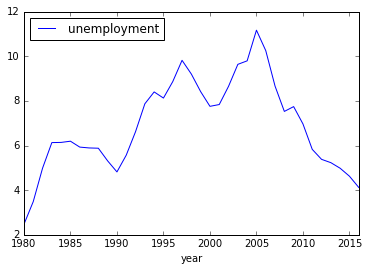

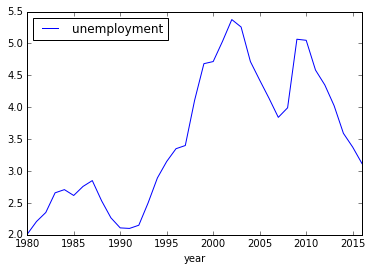

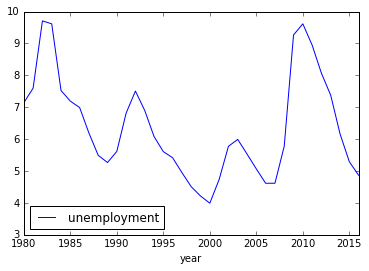

In [39]:
df.groupby('country').plot(x='year', y='unemployment')

Oh boy, maybe that was a little too separately! We'll talk about this more when we discuss matplotlib-y stuff like **figures, axes and subplots**, but the basic idea is first we need to **create a graph**, and then we'll tell pandas to keep drawing on top of the same graph for every single chart.

country
Australia    Axes(0.125,0.125;0.775x0.775)
Germany      Axes(0.125,0.125;0.775x0.775)
Japan        Axes(0.125,0.125;0.775x0.775)
USA          Axes(0.125,0.125;0.775x0.775)
dtype: object

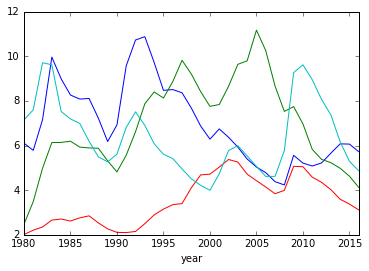

In [44]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
df.groupby('country').plot(x='year', y='unemployment', ax=ax, legend=False)

## In summary

Overall, you just need to know if you have a **meaningful index**.

* **Did you do a groupby or value_counts()?** You can use `.plot()`
* **Do you have a normal dataframe?** You should probably set `x` and `y`.

Next up we'll talk about how to customize graphics, and the large role that `matplotlib` plays in graphing with pandas.